In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
train = "Training"
test = "Testing"

In [3]:
image_height,image_width = 224,224
batch_size = 16
num_of_class = 4

In [4]:
# data augmentation
train_data_gen= ImageDataGenerator(
    rescale = 1./255.0,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)
test_data_gen= ImageDataGenerator(
        rescale = 1./255.0
)

In [5]:
train_generator = train_data_gen.flow_from_directory(
    train, 
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode= 'categorical'
)
test_generator = test_data_gen.flow_from_directory(
    test, 
    target_size = (image_height, image_width),
    batch_size = batch_size,
    class_mode= 'categorical'
)

Found 2870 images belonging to 4 classes.
Found 395 images belonging to 4 classes.


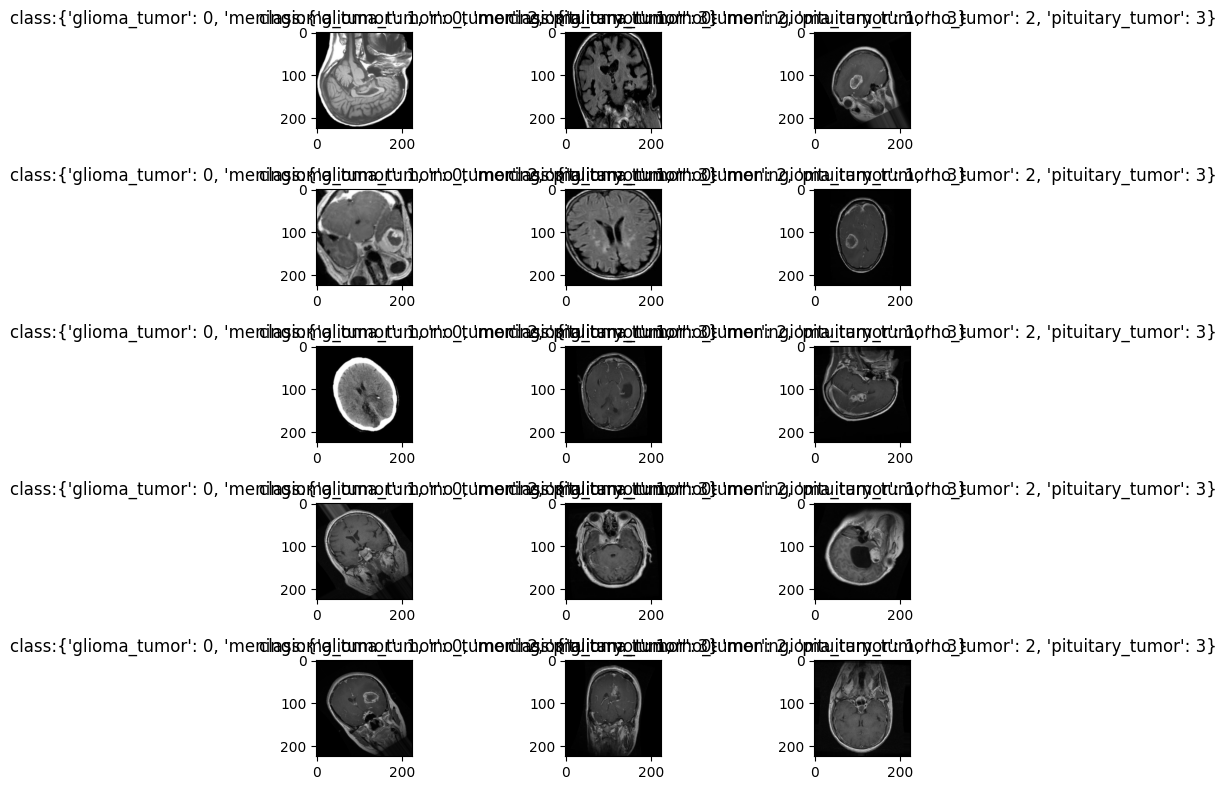

In [6]:
# visualize the image 
def visualize(image, num_of_image=15):
    images, labels = next(image)
    plt.figure(figsize=(8,8))
    for i in range(num_of_image):
        plt.subplot(5,3, i + 1)
        plt.imshow(images[i])
        plt.title(f'class:{image.class_indices}')
        
    plt.tight_layout()
    plt.show()

visualize(train_generator)

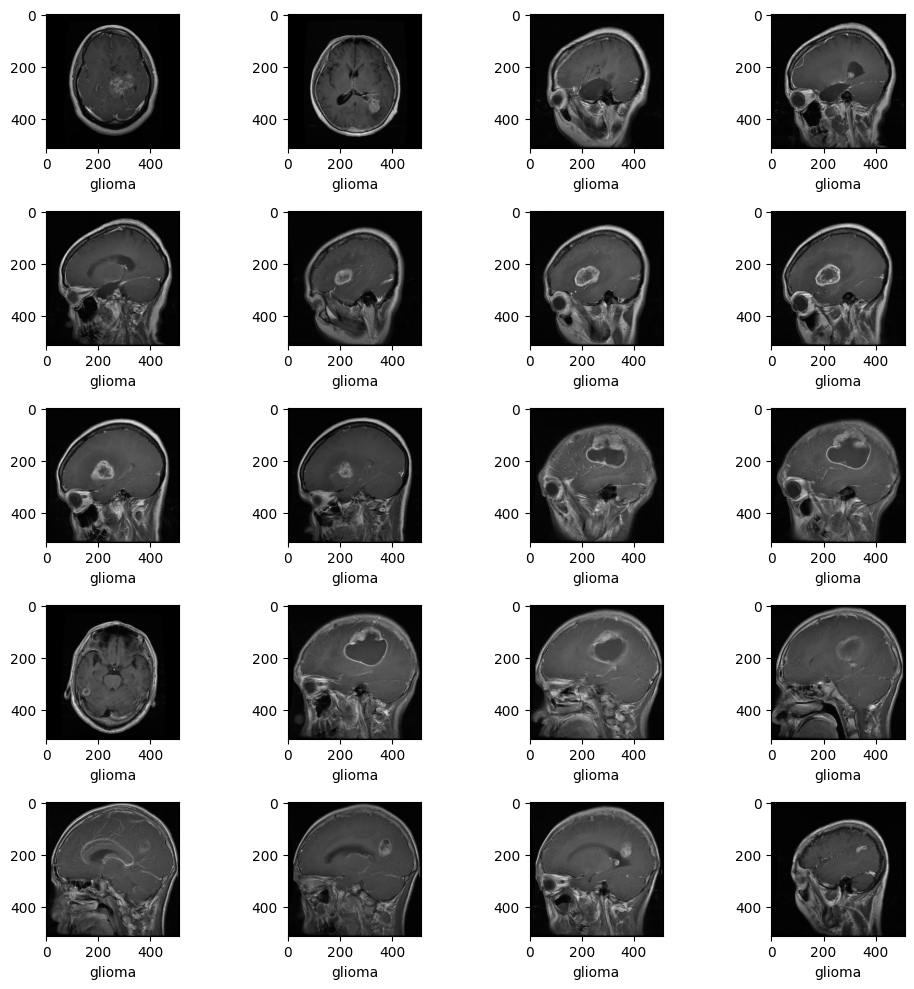

In [16]:
from PIL import Image
class_name = [folder.replace("_tumor","") for folder in os.listdir(train) if os.path.isdir(os.path.join(train, folder))]
train_image =[]
train_labels =[]
for folder in os.listdir(train):
    folder_path = os.path.join(train, folder)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            train_image.append(os.path.join(folder_path, img_file))
            train_labels.append(folder.replace("_tumor",""))


plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4, i + 1)
    img = Image.open(train_image[i])
    plt.imshow(img)
    plt.grid(False)
    plt.xlabel(train_labels[i], fontsize=10)

plt.tight_layout()
plt.show()


In [17]:
# cnn 
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape= (image_height,image_width,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((.2)),

    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((.2)),

    layers.Conv2D(128,(3,3), activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout((.2)),

    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(4,activation= 'softmax')
])

C:\Users\Sajib Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer="adam",
             loss= 'categorical_crossentropy',
             metrics =["accuracy"])


In [ ]:
histroy = model.fit(
    train_generator,
    steps_per_epoch= train_generator.samples//batch_size,
    epochs = 2,

    validation_data= test_generator,
    validation_steps= test_generator.samples//batch_size
)

C:\Users\Sajib Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
 38/179 ━━━━━━━━━━━━━━━━━━━━ 3:50 2s/step - accuracy: 0.3887 - loss: 24.5835

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label = 'Traiining Accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('train and val accuracy')
plt.grid('off')
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label = 'Traiining loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1])  # Dynamic y-axis limit
plt.legend(loc='lower right')
plt.title('train and val loss')
plt.grid('off')
plt.show()